In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
data = pd.read_csv("/Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data.isnull().sum()
#checking null values

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


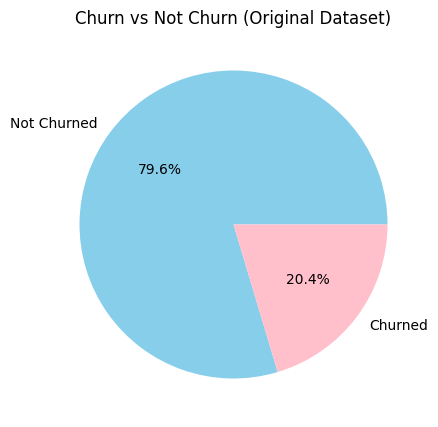

In [ ]:
import matplotlib.pyplot as plt

labels = ['Not Churned', 'Churned']
sizes = data['Exited'].value_counts().values

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'pink'])
plt.title('Churn vs Not Churn (Original Dataset)')
plt.show()

In [ ]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
data
#dropping unnecessary columns

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)
data
#converting data into numerical data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [ ]:
#splitting features and target

X = data.drop('Exited', axis=1)
y = data['Exited']

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#train-test-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (8000, 11)
Testing set size: (2000, 11)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
results_df

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1995,1,0
1996,0,0
1997,1,0
1998,1,0


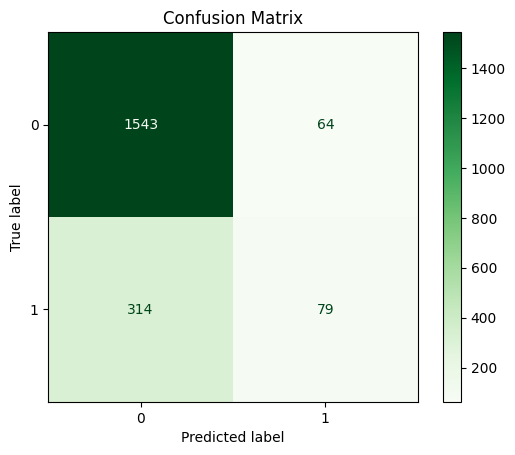

In [ ]:
cm = confusion_matrix(results_df['Actual'], results_df['Predicted'])
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy: 0.8110
Confusion Matrix:
 [[1543   64]
 [ 314   79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



### Evaluation of Logistic Regression Model

This Logistic Regression model gave  an overall accuracy of **81.10%**, which is good.  
However, after analyzing the classification report and confusion matrix, we have  found that the model performs poorly in predicting customers who actually churn (class 1).

- Recall for class 1(churn) is only **0.20**, that means it correctly identifies only 20% of actual churners.
- This could lead to significant business loss, as the model is missing many customers who are likely to leave.

Due to this limitation, we decided to try a different algorithm — **Random Forest**, which often performs better on imbalanced datasets like this one.

In [ ]:
# Importing the model
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# model training
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
# prediction
y_pred_rf = rf_model.predict(X_test)

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", report_rf)

Random Forest Accuracy: 0.8670
Confusion Matrix:
 [[1549   58]
 [ 208  185]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [ ]:
y_pred_rf = rf_model.predict(X_test)
results_rf = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred_rf})
results_rf

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1995,1,1
1996,0,0
1997,1,1
1998,1,0


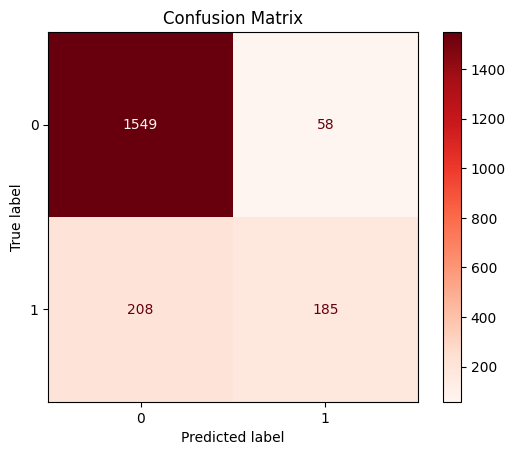

In [ ]:
coma = confusion_matrix(results_rf['Actual'], results_rf['Predicted'])

from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matrix=coma)
display.plot(cmap='Reds')
plt.title('Confusion Matrix')
plt.show()

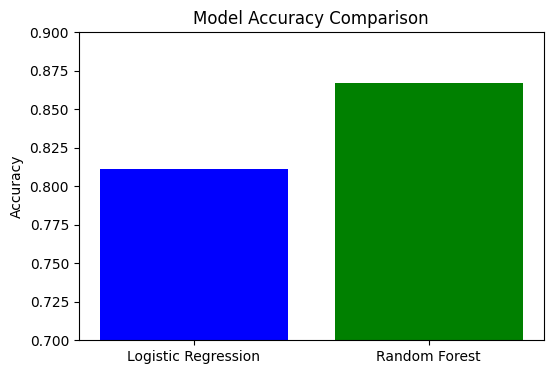

In [ ]:
# Accuracy  comparison
accuracy = 0.8110
accuracy_rf = 0.8670
models = ['Logistic Regression', 'Random Forest']
accuracies = [accuracy, accuracy_rf]

plt.figure(figsize=(6,4))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylim(0.7, 0.9)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

###  Conclusion

In this project, we  have built a machine learning model to predict Customer Churn using a dataset which have various customer attributes.

firstly we have implemented the **Logistic Regression model**, which achieved an accuracy of **81.10%** but  the model's recall for churners was only **0.20**, it  means it has missed many actual churners.

To improve this, we have  implemented a **Random Forest Classifier**, which improved overall performance:
- **Accuracy** increased to **86.70%**
- **Recall for churners** improved  to **0.47**
- **F1-score** for churners improved from **0.29 to 0.58**

This shows that Random Forest is better at identifying customers likely to churn, which can help businesses take action in time. Hence, we chose **Random Forest** as the final model.